# Regresión con Redes Neuronales

In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

In [3]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

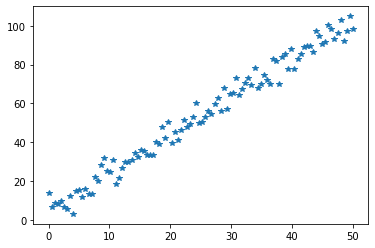

In [4]:
m = 2
b = 3
x = np.linspace(0, 50, 100)
np.random.seed(101)
noise = np.random.normal(loc=0.0, scale=4.0, size=len(x))
y = m*x + b + noise
plt.plot(x, y, '*')

In [5]:
from keras.models import Sequential
from keras.layers import Dense # todas las neuronas conectadas

In [6]:
model = Sequential()
# 4 neuronas, esperamos 1 solo input
model.add(Dense(4, input_dim=1, activation="relu"))
# 4 neuronas
model.add(Dense(4, activation="relu"))
# 1 neurona para el output que es y
model.add(Dense(1, activation="linear"))
# compilarmos
model.compile(loss="mse", optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 3692.3127
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3682.5510
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 3672.5383
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 3662.3340
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 3652.1777
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 3641.5696
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 3630.3496
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 3618.9094
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 3606.8110
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 3594.3501
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 3581.6765
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 3568.0291
Epoch 13/200
4/4 [=======

4/4 [==============================] - 0s 3ms/step - loss: 183.3161
Epoch 102/200
4/4 [==============================] - 0s 3ms/step - loss: 167.6940
Epoch 103/200
4/4 [==============================] - 0s 3ms/step - loss: 152.1057
Epoch 104/200
4/4 [==============================] - 0s 3ms/step - loss: 139.3206
Epoch 105/200
4/4 [==============================] - 0s 3ms/step - loss: 125.8861
Epoch 106/200
4/4 [==============================] - 0s 3ms/step - loss: 113.6859
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 103.6745
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 93.9222
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 85.6829
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 78.1827
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 70.8113
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 64.5611
Epoch 113/200
4/4 [================

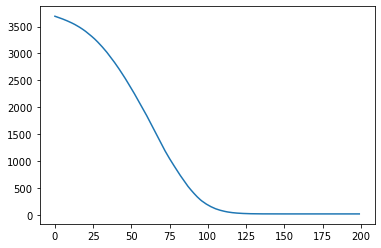

In [8]:
loss = model.history.history["loss"]
epochs = range(len(loss))
plt.plot(epochs, loss)

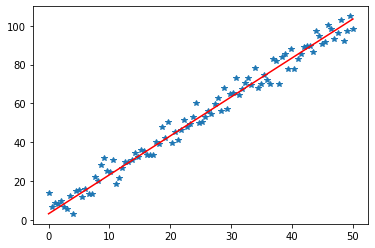

In [9]:
x_new = np.linspace(0, 50, 1000)
y_pred = model.predict(x_new)
plt.plot(x, y, "*")
plt.plot(x_new, y_pred, "r")

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y, model.predict(x))

17.39249899910621

## Red neuronales recurrentes RNN

Las RNN están específicamente diseñadas para trabajar con datos secuenciales como por ejemplo series de tiempo. También otros datos que se pueden considerar secuencias, como por ejemplo texto, que es lo que nos enfocamos cuando hacemos procesamiento de lenguaje natural, audio, música, trayectorias de coches, etc.

La idea fundamental es, partiendo de una secuencia, ¿podemos predecir una secuencia similar movida un tiempo adelante en el futuro? $[1,2,3,4] \rightarrow [1,2,3,4,5]$.

Una red neuronal pre-alimentada (**feed-forward**) es una red artificial donde las conexiones entre las unidades no forman un ciclo. A diferencia de las feed-forward, una RNN devuelve el output como nuevo input donde la salida del tiempo $t-1$ es el input del tiempo $t$ y este a su vez devuelve una salida que es el input del tiempo $t+1$. Se dice que las neuronas tienen memoria (**memory-cell**) puesto que en cada neurona tenemos como input el dato del tiempo actual más el output del tiempo anterior (información actual y del pasado). Estos inputs procedentes de neuronas anteriores se conocen como **hidden-inputs**.

Uno de los problemas de las RNN es que la información del principio se va perdiendo con el tiempo. Para solucionar este problema surgen las LSTM.

### Long-Short Term Memory LSTM

Introduce un nuevo componente en la arquitectura de red que tiene en cuenta el estado de la celda anterior.

- Entradas: input data $x_t$, hidden-layer $h_{t-1}$, y estado de la neurona anterior $C_{t-1}$.
- Cuatro capas intermedias: 
    - Forget Gate Layer. Capa que olvida cierta información.
    $$f_t = \sigma (W_f[h_{t-1} + x_t] + b_f)$$
    - Input Gate Layer. Agrega información que queremos conservar.
    $$i_t = \sigma (W_i[h_{t-1} + x_t] + b_i )$$
    - Estado de la neurona actual.
    $$\bar{C_t} = tanh(W_c[h_{t-1} + x_t] + b_c)$$
    - Nueva hidden-layer
    $$o_t = \sigma(W_o[h_{t-1} + x_t] + b_o))$$
- Combinación de información (a olvidar y permanecer) para producir nuevo estado de celda.
$$C_t = f_t*C{t-1} + i_t*\bar{C_t}$$
- Salida de nueva hidden-layer
$$h_t = o_t*tanh(C_t)$$

#### LSTM peepholes (con mirillas)

En cada capa intermedia dejamos que cada sigmoide pueda trabajar la información de la celda anterior.

$$f_t = \sigma (W_f[C_{t-1}, h_{t-1} + x_t] + b_f)$$
$$i_t = \sigma (W_i[C_{t-1}, h_{t-1} + x_t] + b_i )$$
$$o_t = \sigma(W_o[C_t, h_{t-1} + x_t] + b_o))$$